In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
## Reading the observational data: r1/2 and Re ======================

data_ufd = np.genfromtxt('D:/Research/ultra-faint dwarf galaxies/observational_data/r05_ufd.txt',dtype='str')
r05_ufd = np.array(data_ufd[:,2], dtype='float32')
sm_ufd = np.array(data_ufd[:,3], dtype='float32')
sm_ufd = sm_ufd * 1e6

data_dsph = np.genfromtxt('D:/Research/ultra-faint dwarf galaxies/observational_data/r05_dsph.txt',dtype='str')
r05_dsph = np.array(data_dsph[:,2], dtype='float32')
sm_dsph = np.array(data_dsph[:,3], dtype='float32')
sm_dsph = sm_dsph * 1e6

data_sim_2021 = np.genfromtxt('r_halfs.txt', dtype='str')
r05_ufd_sim_2021 = np.array(data_sim_2021[:,1], dtype='float32')
r05_ufd_sim_2021 = r05_ufd_sim_2021 * 1000 # converting kpc into pc
sm_ufd_sim_2021 = np.array(data_sim_2021[:,2], dtype='float32') # already in Msun

data_sim_2017 = np.genfromtxt('r_halfs_2017.txt', dtype='str')
r05_ufd_sim_2017 = np.array(data_sim_2017[:,1], dtype='float32')
r05_ufd_sim_2017 = r05_ufd_sim_2017 * 1000 # converting kpc into pc
sm_ufd_sim_2017 = np.array(data_sim_2017[:,2], dtype='float32') # already in Msun

# importing Hannah's data file
data_Hannah = np.genfromtxt('D:/Research/ultra-faint dwarf galaxies/Hannah_ObsData_May13_2022/ufdTreasuryInfo.txt',\
                            dtype='str')

dwarf_name_Hannah = np.array(data_Hannah[1:,0])

r05_ufd_Hannah = np.array(data_Hannah[1:,12], dtype='float32') # unit: pc
r05_ufd_Hannah_up_error = np.array(data_Hannah[1:,13], dtype='float32')
r05_ufd_Hannah_down_error = np.array(data_Hannah[1:,14], dtype='float32')

sigma_ufd_Hannah = np.array(data_Hannah[1:,16], dtype='float32') # unit: km/s
sigma_ufd_Hannah_up_error = np.array(data_Hannah[1:,17], dtype='float32')
sigma_ufd_Hannah_down_error = np.array(data_Hannah[1:,18], dtype='float32')

sm_ufd_Hannah = np.array(data_Hannah[1:,5], dtype='float32') # unit: Msun. assuming Kroupa IMF. if Salpeter IMF: idx = 8
sm_ufd_Hannah_up_error = np.array(data_Hannah[1:,6], dtype='float32')
sm_ufd_Hannah_down_error = np.array(data_Hannah[1:,7], dtype='float32')

# removing all the unknown values in Hannah's data file
# first, check using the stellar mass array

dwarf_name_Hannah = dwarf_name_Hannah[sm_ufd_Hannah > 0]

r05_ufd_Hannah = r05_ufd_Hannah[sm_ufd_Hannah > 0]
r05_ufd_Hannah_up_error = r05_ufd_Hannah_up_error[sm_ufd_Hannah > 0]
r05_ufd_Hannah_down_error = r05_ufd_Hannah_down_error[sm_ufd_Hannah > 0]

sigma_ufd_Hannah = sigma_ufd_Hannah[sm_ufd_Hannah > 0]
sigma_ufd_Hannah_up_error = sigma_ufd_Hannah_up_error[sm_ufd_Hannah > 0]
sigma_ufd_Hannah_down_error = sigma_ufd_Hannah_down_error[sm_ufd_Hannah > 0]

sm_ufd_Hannah_up_error = sm_ufd_Hannah_up_error[sm_ufd_Hannah > 0]
sm_ufd_Hannah_down_error = sm_ufd_Hannah_down_error[sm_ufd_Hannah > 0]
sm_ufd_Hannah = sm_ufd_Hannah[sm_ufd_Hannah > 0]

# next, check using the velocity dispersion array

dwarf_name_Hannah = dwarf_name_Hannah[sigma_ufd_Hannah > 0]

r05_ufd_Hannah = r05_ufd_Hannah[sigma_ufd_Hannah > 0]
r05_ufd_Hannah_up_error = r05_ufd_Hannah_up_error[sigma_ufd_Hannah > 0]
r05_ufd_Hannah_down_error = r05_ufd_Hannah_down_error[sigma_ufd_Hannah > 0]
r05_ufd_Hannah_error = [r05_ufd_Hannah_down_error, r05_ufd_Hannah_up_error]

sm_ufd_Hannah = sm_ufd_Hannah[sigma_ufd_Hannah > 0]
sm_ufd_Hannah_up_error = sm_ufd_Hannah_up_error[sigma_ufd_Hannah > 0]
sm_ufd_Hannah_down_error = sm_ufd_Hannah_down_error[sigma_ufd_Hannah > 0]
sm_ufd_Hannah_error = [sm_ufd_Hannah_down_error, sm_ufd_Hannah_up_error]

sigma_ufd_Hannah_up_error = sigma_ufd_Hannah_up_error[sigma_ufd_Hannah > 0]
sigma_ufd_Hannah_down_error = sigma_ufd_Hannah_down_error[sigma_ufd_Hannah > 0]
sigma_ufd_Hannah = sigma_ufd_Hannah[sigma_ufd_Hannah > 0]
sigma_ufd_Hannah_error = [sigma_ufd_Hannah_down_error, sigma_ufd_Hannah_up_error]

print(np.log10(sigma_ufd_Hannah))
print(np.log10(sigma_ufd_Hannah_up_error))
print(np.log10(sigma_ufd_Hannah_down_error))

[1.0211893  0.81954396 0.36921585 0.770852   1.0170333  0.30103
 0.6901961  1.0791812  0.73239374 0.968483   0.9777236  0.5185139
 0.23044893 0.59106463 0.41497332 0.8976271  0.6232493  0.9344985
 0.17609125 0.63346845 0.8692317  0.748188   0.63346845]
[ 0.8692317   0.07918126 -0.37675074  1.9777236   0.968483    1.9800034
  0.44715804  0.69897     0.47712126 -0.15490197  0.8325089  -0.15490197
 -0.30103    -0.09691001  1.9777236   0.11394334  1.9777236   0.6434527
  1.9800034   0.23044893  1.9242793   0.14612803  0.36172783]
[ 0.8692317   0.07918126 -0.5228787   1.9777236   0.7075702   1.9800034
 -0.0457575          nan  0.39794    -0.15490197  0.6434527  -0.15490197
 -0.30103    -0.09691001  1.9777236   0.11394334  1.9777236   0.43136376
  1.9800034   0.          1.9242793   0.14612803  0.11394334]


<ipython-input-2-3220cf1cd1d3>:79: RuntimeWarning: invalid value encountered in log10
  print(np.log10(sigma_ufd_Hannah_down_error))


In [3]:
print(sm_ufd_sim_2021)
print(sm_ufd_sim_2017)

[17538.762  6494.742  6102.62   2203.173]
[ 44737.934  84865.57  131056.23  204151.38  890448.   ]


In [4]:
sigma_2021_1noRT = np.array(data_sim_2021[0, 3:], dtype='float32') # km/s
sigma_2021_1RT = np.array(data_sim_2021[1, 3:], dtype='float32') # km/s
sigma_2021_2noRT = np.array(data_sim_2021[2, 3:], dtype='float32') # km/s
sigma_2021_2RT = np.array(data_sim_2021[3, 3:], dtype='float32') # km/s

sigma_2017_h1 = np.array(data_sim_2017[0, 3:], dtype='float32') # km/s
sigma_2017_h3 = np.array(data_sim_2017[1, 3:], dtype='float32') # km/s
sigma_2017_h4 = np.array(data_sim_2017[2, 3:], dtype='float32') # km/s
sigma_2017_h5 = np.array(data_sim_2017[3, 3:], dtype='float32') # km/s
sigma_2017_h6 = np.array(data_sim_2017[4, 3:], dtype='float32') # km/s

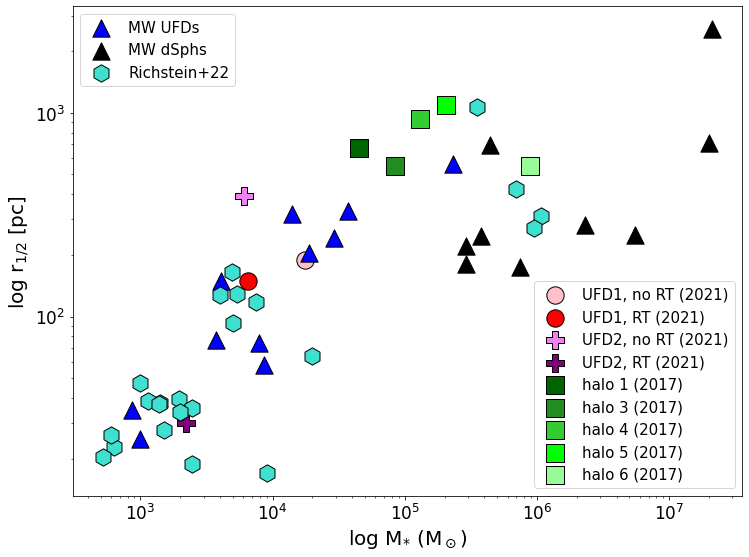

In [5]:
fig, ax = plt.subplots(figsize=[12, 9])

marker1 = plt.scatter(sm_ufd_sim_2021[0], r05_ufd_sim_2021[0], marker='o', s=300, edgecolor='black', 
            color='pink', label='UFD1, no RT (2021)')
marker2 = plt.scatter(sm_ufd_sim_2021[1], r05_ufd_sim_2021[1], marker='o', s=300, edgecolor='black', 
            color='red', label='UFD1, RT (2021)')
marker3 = plt.scatter(sm_ufd_sim_2021[2], r05_ufd_sim_2021[2], marker='P', s=300, edgecolor='black', 
            color='violet', label='UFD2, no RT (2021)')
marker4 = plt.scatter(sm_ufd_sim_2021[3], r05_ufd_sim_2021[3], marker='P', s=300, edgecolor='black', 
            color='purple', label='UFD2, RT (2021)')

marker5 = plt.scatter(sm_ufd_sim_2017[0], r05_ufd_sim_2017[0], marker='s', s=300, edgecolor='black', 
            color='darkgreen', label='halo 1 (2017)')
marker6 = plt.scatter(sm_ufd_sim_2017[1], r05_ufd_sim_2017[1], marker='s', s=300, edgecolor='black', 
            color='forestgreen', label='halo 3 (2017)')
marker7 = plt.scatter(sm_ufd_sim_2017[2], r05_ufd_sim_2017[2], marker='s', s=300, edgecolor='black', 
            color='limegreen', label='halo 4 (2017)')
marker8 = plt.scatter(sm_ufd_sim_2017[3], r05_ufd_sim_2017[3], marker='s', s=300, edgecolor='black', 
            color='lime', label='halo 5 (2017)')
marker9 = plt.scatter(sm_ufd_sim_2017[4], r05_ufd_sim_2017[4], marker='s', s=300, edgecolor='black', 
            color='palegreen', label='halo 6 (2017)')

marker10 = plt.scatter(sm_ufd, r05_ufd, marker='^', s=300, edgecolor='black', 
            color='blue', label='MW UFDs')
marker11 = plt.scatter(sm_dsph, r05_dsph, marker='^', s=300, edgecolor='black', 
            color='black', label='MW dSphs')
marker12 = plt.scatter(sm_ufd_Hannah, r05_ufd_Hannah, marker='h', s=300, edgecolor='black', color='turquoise', \
                       label='Richstein+22')

legend1 = plt.legend(handles=[marker1, marker2, marker3, marker4, marker5, marker6, marker7, marker8, marker9], \
                     loc='lower right', fontsize=15)
legend2 = plt.legend(handles=[marker10, marker11, marker12], loc='upper left', fontsize=15)
plt.gca().add_artist(legend1)

plt.xlabel('log M$_{*}$ (M$_\odot$)', fontsize=20)
plt.ylabel('log r$_{1/2}$ [pc]', fontsize=20)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)

plt.yscale('log')
plt.xscale('log')

plt.savefig('logr12logMstar.png')

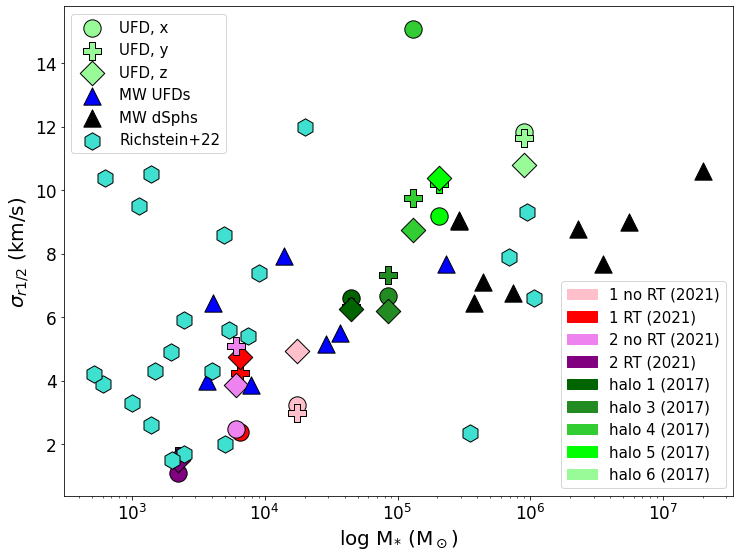

In [6]:
### Reading the observational data: dispersion for Re ======================

fig, ax = plt.subplots(figsize=[12, 9])

patch1 = mpatches.Patch(color='pink', label='1 no RT (2021)')
patch2 = mpatches.Patch(color='red', label='1 RT (2021)')
patch3 = mpatches.Patch(color='violet', label='2 no RT (2021)')
patch4 = mpatches.Patch(color='purple', label='2 RT (2021)')

plt.scatter(sm_ufd_sim_2021[0], sigma_2021_1noRT[0], s=300, marker='o', color='pink', edgecolor='black')
plt.scatter(sm_ufd_sim_2021[0], sigma_2021_1noRT[1], s=300, marker='P', color='pink', edgecolor='black')
plt.scatter(sm_ufd_sim_2021[0], sigma_2021_1noRT[2], s=300, marker='D', color='pink', edgecolor='black')

plt.scatter(sm_ufd_sim_2021[1], sigma_2021_1RT[0], s=300, marker='o', color='red', edgecolor='black')
plt.scatter(sm_ufd_sim_2021[1], sigma_2021_1RT[1], s=300, marker='P', color='red', edgecolor='black')
plt.scatter(sm_ufd_sim_2021[1], sigma_2021_1RT[2], s=300, marker='D', color='red', edgecolor='black')

plt.scatter(sm_ufd_sim_2021[2], sigma_2021_2noRT[0], s=300, marker='o', color='violet', edgecolor='black')
plt.scatter(sm_ufd_sim_2021[2], sigma_2021_2noRT[1], s=300, marker='P', color='violet', edgecolor='black')
plt.scatter(sm_ufd_sim_2021[2], sigma_2021_2noRT[2], s=300, marker='D', color='violet', edgecolor='black')

plt.scatter(sm_ufd_sim_2021[3], sigma_2021_2RT[0], s=300, marker='o', color='purple', edgecolor='black')
plt.scatter(sm_ufd_sim_2021[3], sigma_2021_2RT[1], s=300, marker='P', color='purple', edgecolor='black')
plt.scatter(sm_ufd_sim_2021[3], sigma_2021_2RT[2], s=300, marker='D', color='purple', edgecolor='black')

patch5 = mpatches.Patch(color='darkgreen', label='halo 1 (2017)')
patch6 = mpatches.Patch(color='forestgreen', label='halo 3 (2017)')
patch7 = mpatches.Patch(color='limegreen', label='halo 4 (2017)')
patch8 = mpatches.Patch(color='lime', label='halo 5 (2017)')
patch9 = mpatches.Patch(color='palegreen', label='halo 6 (2017)')

plt.scatter(sm_ufd_sim_2017[0], sigma_2017_h1[0], s=300, marker='o', color='darkgreen', edgecolor='black')
plt.scatter(sm_ufd_sim_2017[0], sigma_2017_h1[1], s=300, marker='P', color='darkgreen', edgecolor='black')
plt.scatter(sm_ufd_sim_2017[0], sigma_2017_h1[2], s=300, marker='D', color='darkgreen', edgecolor='black')

plt.scatter(sm_ufd_sim_2017[1], sigma_2017_h3[0], s=300, marker='o', color='forestgreen', edgecolor='black')
plt.scatter(sm_ufd_sim_2017[1], sigma_2017_h3[1], s=300, marker='P', color='forestgreen', edgecolor='black')
plt.scatter(sm_ufd_sim_2017[1], sigma_2017_h3[2], s=300, marker='D', color='forestgreen', edgecolor='black')

plt.scatter(sm_ufd_sim_2017[2], sigma_2017_h4[0], s=300, marker='o', color='limegreen', edgecolor='black')
plt.scatter(sm_ufd_sim_2017[2], sigma_2017_h4[1], s=300, marker='P', color='limegreen', edgecolor='black')
plt.scatter(sm_ufd_sim_2017[2], sigma_2017_h4[2], s=300, marker='D', color='limegreen', edgecolor='black')

plt.scatter(sm_ufd_sim_2017[3], sigma_2017_h5[0], s=300, marker='o', color='lime', edgecolor='black')
plt.scatter(sm_ufd_sim_2017[3], sigma_2017_h5[1], s=300, marker='P', color='lime', edgecolor='black')
plt.scatter(sm_ufd_sim_2017[3], sigma_2017_h5[2], s=300, marker='D', color='lime', edgecolor='black')

plt.scatter(sm_ufd_sim_2017[4], sigma_2017_h6[0], s=300, marker='o', color='palegreen', \
            edgecolor='black', label='UFD, x')
plt.scatter(sm_ufd_sim_2017[4], sigma_2017_h6[1], s=300, marker='P', color='palegreen', \
            edgecolor='black', label='UFD, y')
plt.scatter(sm_ufd_sim_2017[4], sigma_2017_h6[2], s=300, marker='D', color='palegreen', \
            edgecolor='black', label='UFD, z')

m_UFD = [0.0037e6, 0.0041e6, 0.0079e6, 0.014e6, 0.029e6, 0.037e6, 0.23e6] #Myoungwon's observational data
disp_UFD = [4.0, 6.46, 3.88, 7.93, 5.16, 5.49, 7.67] #Myoungwon's observational data
m_dSph = [0.29e6, 0.29e6, 0.38e6, 0.44e6, 0.74e6, 2.3e6, 3.5e6, 5.5e6, 20e6] #Myoungwon's observational data
disp_dSph = [9.05, 9.02, 6.44, 7.10, 6.76, 8.79, 7.68, 8.99, 10.59] #Myoungwon's observational data

plt.scatter(m_UFD, disp_UFD, marker='^', s=300, edgecolor='black', color='blue', label='MW UFDs')
plt.scatter(m_dSph, disp_dSph, marker='^', s=300, edgecolor='black', color='black', label='MW dSphs')
plt.scatter(sm_ufd_Hannah, sigma_ufd_Hannah, marker='h', s=300, edgecolor='black', color='turquoise', label='Richstein+22')

legend1 = plt.legend(handles=[patch1, patch2, patch3, patch4, patch5, patch6, patch7, patch8, patch9], \
                     loc='lower right', fontsize=15)
legend2 = plt.legend(loc='upper left', fontsize=15)
plt.gca().add_artist(legend1)

plt.xlabel('log M$_{*}$ (M$_\odot$)', fontsize=20)
plt.ylabel('$\sigma_{r1/2}$ (km/s)', fontsize=20)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.xscale('log')

plt.savefig('logMstarsigmaRe.png')

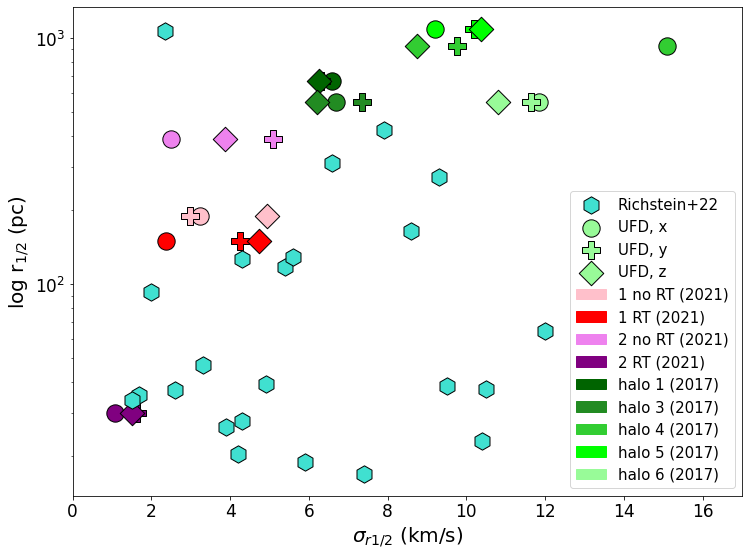

In [7]:
# Plot r_half vs sigma

fig, ax = plt.subplots(figsize=[12, 9])

patch1 = mpatches.Patch(color='pink', label='1 no RT (2021)')
patch2 = mpatches.Patch(color='red', label='1 RT (2021)')
patch3 = mpatches.Patch(color='violet', label='2 no RT (2021)')
patch4 = mpatches.Patch(color='purple', label='2 RT (2021)')

plt.scatter(sigma_2021_1noRT[0], r05_ufd_sim_2021[0], s=300, marker='o', color='pink', edgecolor='black')
plt.scatter(sigma_2021_1noRT[1], r05_ufd_sim_2021[0], s=300, marker='P', color='pink', edgecolor='black')
plt.scatter(sigma_2021_1noRT[2], r05_ufd_sim_2021[0], s=300, marker='D', color='pink', edgecolor='black')

plt.scatter(sigma_2021_1RT[0], r05_ufd_sim_2021[1], s=300, marker='o', color='red', edgecolor='black')
plt.scatter(sigma_2021_1RT[1], r05_ufd_sim_2021[1], s=300, marker='P', color='red', edgecolor='black')
plt.scatter(sigma_2021_1RT[2], r05_ufd_sim_2021[1], s=300, marker='D', color='red', edgecolor='black')

plt.scatter(sigma_2021_2noRT[0], r05_ufd_sim_2021[2], s=300, marker='o', color='violet', edgecolor='black')
plt.scatter(sigma_2021_2noRT[1], r05_ufd_sim_2021[2], s=300, marker='P', color='violet', edgecolor='black')
plt.scatter(sigma_2021_2noRT[2], r05_ufd_sim_2021[2], s=300, marker='D', color='violet', edgecolor='black')

plt.scatter(sigma_2021_2RT[0], r05_ufd_sim_2021[3], s=300, marker='o', color='purple', edgecolor='black')
plt.scatter(sigma_2021_2RT[1], r05_ufd_sim_2021[3], s=300, marker='P', color='purple', edgecolor='black')
plt.scatter(sigma_2021_2RT[2], r05_ufd_sim_2021[3], s=300, marker='D', color='purple', edgecolor='black')

patch5 = mpatches.Patch(color='darkgreen', label='halo 1 (2017)')
patch6 = mpatches.Patch(color='forestgreen', label='halo 3 (2017)')
patch7 = mpatches.Patch(color='limegreen', label='halo 4 (2017)')
patch8 = mpatches.Patch(color='lime', label='halo 5 (2017)')
patch9 = mpatches.Patch(color='palegreen', label='halo 6 (2017)')

plt.scatter(sigma_2017_h1[0], r05_ufd_sim_2017[0], s=300, marker='o', color='darkgreen', edgecolor='black')
plt.scatter(sigma_2017_h1[1], r05_ufd_sim_2017[0], s=300, marker='P', color='darkgreen', edgecolor='black')
plt.scatter(sigma_2017_h1[2], r05_ufd_sim_2017[0], s=300, marker='D', color='darkgreen', edgecolor='black')

plt.scatter(sigma_2017_h3[0], r05_ufd_sim_2017[1], s=300, marker='o', color='forestgreen', edgecolor='black')
plt.scatter(sigma_2017_h3[1], r05_ufd_sim_2017[1], s=300, marker='P', color='forestgreen', edgecolor='black')
plt.scatter(sigma_2017_h3[2], r05_ufd_sim_2017[1], s=300, marker='D', color='forestgreen', edgecolor='black')

plt.scatter(sigma_2017_h4[0], r05_ufd_sim_2017[2], s=300, marker='o', color='limegreen', edgecolor='black')
plt.scatter(sigma_2017_h4[1], r05_ufd_sim_2017[2], s=300, marker='P', color='limegreen', edgecolor='black')
plt.scatter(sigma_2017_h4[2], r05_ufd_sim_2017[2], s=300, marker='D', color='limegreen', edgecolor='black')

plt.scatter(sigma_2017_h5[0], r05_ufd_sim_2017[3], s=300, marker='o', color='lime', edgecolor='black')
plt.scatter(sigma_2017_h5[1], r05_ufd_sim_2017[3], s=300, marker='P', color='lime', edgecolor='black')
plt.scatter(sigma_2017_h5[2], r05_ufd_sim_2017[3], s=300, marker='D', color='lime', edgecolor='black')

marker1 = plt.scatter(sigma_2017_h6[0], r05_ufd_sim_2017[4], s=300, marker='o', color='palegreen', \
            edgecolor='black', label='UFD, x')
marker2 = plt.scatter(sigma_2017_h6[1], r05_ufd_sim_2017[4], s=300, marker='P', color='palegreen', \
            edgecolor='black', label='UFD, y')
marker3 = plt.scatter(sigma_2017_h6[2], r05_ufd_sim_2017[4], s=300, marker='D', color='palegreen', \
            edgecolor='black', label='UFD, z')

marker4 = plt.scatter(sigma_ufd_Hannah, r05_ufd_Hannah, marker='h', s=300, \
                      edgecolor='black', color='turquoise', label='Richstein+22')

plt.legend(handles=[marker4, marker1, marker2, marker3, patch1, patch2, patch3, patch4, patch5, patch6, \
                    patch7, patch8, patch9], loc='lower right', fontsize=15)
#legend2 = plt.legend(loc='upper left', fontsize=15)
#plt.gca().add_artist(legend1)

plt.xlabel('$\sigma_{r1/2}$ (km/s)', fontsize=20)
plt.ylabel('log r$_{1/2}$ (pc)', fontsize=20)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.yscale('log')
plt.xlim(0, 17) # this's just for better plotting

plt.savefig('sigmar05_vs_r05.png')

In [8]:
###### this exports data to a .csv file to be put into Overleaf

print(sm_ufd_Hannah)
print(r05_ufd_Hannah)
print(sigma_ufd_Hannah)
print(dwarf_name_Hannah)

[1.40e+03 1.07e+06 3.50e+05 2.47e+03 6.30e+02 5.00e+03 1.96e+03 2.00e+04
 7.46e+03 9.50e+05 1.13e+03 1.00e+03 2.47e+03 6.00e+02 1.38e+03 6.92e+05
 5.20e+02 4.90e+03 2.00e+03 4.00e+03 9.00e+03 5.40e+03 1.50e+03]
[  37.5  311.  1066.    19.    23.    93.    39.3   64.3  118.   273.7
   38.6   47.2   35.5   26.3   37.1  423.    20.4  165.    34.   127.
   17.   129.    27.9]
[10.5   6.6   2.34  5.9  10.4   2.    4.9  12.    5.4   9.3   9.5   3.3
  1.7   3.9   2.6   7.9   4.2   8.6   1.5   4.3   7.4   5.6   4.3 ]
['Bootes-II' 'Carina' 'Crater-2' 'Draco-II' 'Grus-I' 'Grus-II'
 'Horologium-I' 'Hydra-II' 'Pegasus-III' 'Phoenix-I' 'Phoenix-II'
 'Reticulum-II' 'Sagittarius-II' 'Segue-1' 'Segue-2' 'Sextans'
 'Triangulum-II-Laevens2' 'Tucana-II' 'Tucana-III' 'Tucana-IV' 'Tucana-V'
 'Ursa-Major-II' 'Willman-1']


In [9]:
with open("D:/Research/ultra-faint dwarf galaxies/data_Hannah.txt", "w") as f:
    f.write(str('UFD name & M$_{*}$ ($M_\odot$) & r$_{1/2}$ (pc) & $\sigma$$_{r1/2}$ (km/s) /! \hline'))

    for i in range(np.size(sm_ufd_Hannah)):
        f.write(str(dwarf_name_Hannah[i]) + ' & ' + str(format(sm_ufd_Hannah[i], '.2e')) + ' & ' + \
                str(format(r05_ufd_Hannah[i], '.2e')) + ' & ' + str(sigma_ufd_Hannah[i]) + ' /! ')
        f.write('\n')
    
f.close()
print('success!!!')

success!!!
